In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [2]:
resd_data = 'resd_data.xlsx'
data = pd.read_excel(resd_data)

In [3]:
data.describe()

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,field_PostalCode,ListPrice
count,9998.000000,9.998000e+03,9411.000000,9998.000000,9998.000000,6812.000000,9870.000000,9.998000e+03
mean,1931.688038,2.087269e+05,1975.571246,2.914183,2.483097,1.766882,91874.970719,7.962502e+05
std,1993.506568,5.383501e+06,83.226601,1.463516,1.487255,2.453856,2298.199067,1.559266e+06
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1143.000000,5.000000e+03,1960.000000,2.000000,2.000000,1.000000,91007.000000,2.100000e+05
50%,1650.000000,7.405000e+03,1981.000000,3.000000,2.000000,1.000000,92253.000000,4.598500e+05
75%,2427.000000,1.395050e+04,2001.000000,4.000000,3.000000,2.000000,92627.000000,8.296218e+05
max,86448.000000,3.310560e+08,2018.000000,17.000000,25.000000,65.000000,99999.000000,5.100000e+07


In [4]:
#removes data above 7.5k and below 400 sqft (SquareFootageStructure)
data_mod = data[data['SquareFootageStructure']<7500.0]
data_mod = data_mod[data_mod['SquareFootageStructure']>400]

#removes data above 45k and below 400 sqft (LotSquareFootage)
data_mod = data_mod[data_mod['LotSquareFootage']<45000.0]
data_mod = data_mod[data_mod['LotSquareFootage']>400]

#removes data above 2500k and below 50k (ListPrice)
data_mod = data_mod[data_mod['ListPrice']<50000]
data_mod = data_mod[data_mod['ListPrice']>100]

#removes data below 1750 (YearBuilt)
data_mod = data_mod[data_mod['YearBuilt']>1750]

#removes columns from data
data_mod = data_mod.reset_index()
data_mod = data_mod.drop(['index','field_StoriesTotal','field_PostalCode'], axis = 1)

data_mod

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,ListPrice
0,1549.0,5825.0,1974.0,3.0,2.0,3300.0
1,1196.0,7900.0,1981.0,3.0,2.0,1600.0
2,888.0,1806.0,1946.0,2.0,2.0,3500.0
3,1371.0,25095.0,1965.0,3.0,2.0,2350.0
4,1492.0,6586.0,1961.0,4.0,2.0,3200.0
...,...,...,...,...,...,...
1172,2243.0,23060.0,1960.0,3.0,3.0,13000.0
1173,1875.0,7455.0,1989.0,3.0,2.0,2400.0
1174,2030.0,7821.0,1931.0,4.0,5.0,39500.0
1175,2947.0,4100.0,2017.0,5.0,4.0,2950.0


In [5]:
data_mod.describe()

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,ListPrice
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000
mean,1827.158029,8773.006797,1976.739167,2.914189,2.560748,4437.386576
std,943.518585,7448.644019,27.961510,1.145953,1.084800,4632.828983
min,404.000000,436.000000,1897.000000,0.000000,0.000000,750.000000
25%,1174.000000,4356.000000,1959.000000,2.000000,2.000000,2490.000000
50%,1604.000000,6739.000000,1979.000000,3.000000,2.000000,3200.000000
75%,2206.000000,10239.000000,2001.000000,4.000000,3.000000,4590.000000
max,7310.000000,43644.000000,2018.000000,8.000000,8.000000,48500.000000


In [6]:
#create train and test set
rand_idx = random.sample(range(1177), 200)

test_data = data_mod.loc[rand_idx,:]
train_data = data_mod.drop(rand_idx)

test_data = test_data.reset_index()
test_data = test_data.drop(['index'], axis = 1)
train_data = train_data.reset_index()
train_data = train_data.drop(['index'], axis = 1)

print(test_data.shape)
print(train_data.shape)

print(test_data)
print(train_data)

(200, 6)
(977, 6)
     SquareFootageStructure  LotSquareFootage  YearBuilt  Bedrooms  \
0                    2000.0            3000.0     1998.0       3.0   
1                     747.0           22353.0     2016.0       1.0   
2                     700.0            6970.0     1958.0       2.0   
3                    1390.0           15130.0     2005.0       2.0   
4                    2740.0            5500.0     2002.0       4.0   
..                      ...               ...        ...       ...   
195                  1572.0            8276.0     1957.0       3.0   
196                  1200.0           12380.0     1959.0       3.0   
197                  1578.0            1578.0     1981.0       3.0   
198                  2001.0            4750.0     1993.0       4.0   
199                  1900.0            6534.0     2003.0       3.0   

     BathsTotal  ListPrice  
0           3.0     3090.0  
1           1.0     2502.0  
2           1.0     2400.0  
3           3.0     3998.

In [7]:
#create train and test targets
train_targets = train_data['ListPrice'].to_numpy()
train_data = train_data.drop(['ListPrice'], axis = 1)
test_targets = test_data['ListPrice'].to_numpy()
test_data = test_data.drop(['ListPrice'], axis = 1)
train_data_array = train_data.values
test_data_array = test_data.values

In [8]:
train_data_array

array([[1.549e+03, 5.825e+03, 1.974e+03, 3.000e+00, 2.000e+00],
       [1.196e+03, 7.900e+03, 1.981e+03, 3.000e+00, 2.000e+00],
       [8.880e+02, 1.806e+03, 1.946e+03, 2.000e+00, 2.000e+00],
       ...,
       [1.875e+03, 7.455e+03, 1.989e+03, 3.000e+00, 2.000e+00],
       [2.947e+03, 4.100e+03, 2.017e+03, 5.000e+00, 4.000e+00],
       [9.000e+02, 6.000e+03, 1.924e+03, 2.000e+00, 1.000e+00]])

In [9]:
test_data_array

array([[2.0000e+03, 3.0000e+03, 1.9980e+03, 3.0000e+00, 3.0000e+00],
       [7.4700e+02, 2.2353e+04, 2.0160e+03, 1.0000e+00, 1.0000e+00],
       [7.0000e+02, 6.9700e+03, 1.9580e+03, 2.0000e+00, 1.0000e+00],
       [1.3900e+03, 1.5130e+04, 2.0050e+03, 2.0000e+00, 3.0000e+00],
       [2.7400e+03, 5.5000e+03, 2.0020e+03, 4.0000e+00, 3.0000e+00],
       [1.4010e+03, 5.7790e+03, 1.9540e+03, 3.0000e+00, 2.0000e+00],
       [1.1060e+03, 1.1060e+03, 1.9630e+03, 2.0000e+00, 2.0000e+00],
       [1.9020e+03, 6.4370e+03, 1.9490e+03, 3.0000e+00, 3.0000e+00],
       [1.5000e+03, 9.0000e+02, 1.9990e+03, 3.0000e+00, 2.0000e+00],
       [1.2600e+03, 1.3070e+03, 1.9900e+03, 2.0000e+00, 2.0000e+00],
       [2.1460e+03, 6.5090e+03, 1.9520e+03, 5.0000e+00, 3.0000e+00],
       [1.3800e+03, 8.2960e+03, 1.9560e+03, 3.0000e+00, 2.0000e+00],
       [1.0000e+03, 1.7420e+03, 1.9590e+03, 2.0000e+00, 1.0000e+00],
       [1.9850e+03, 2.6950e+03, 1.9710e+03, 3.0000e+00, 3.0000e+00],
       [1.1870e+03, 8.7120e+03, 1.

In [10]:
np.savetxt('train_data4.csv', train_data_array, delimiter = ',')
np.savetxt('test_data4.csv', test_data_array, delimiter = ',')
np.savetxt('train_targets4.csv', train_targets, delimiter = ',')
np.savetxt('test_targets4.csv', test_targets, delimiter = ',')

In [ ]:
from sklearn import linear_model

x = data_mod['SquareFootageStructure'].to_numpy()
y = data_mod['ListPrice'].to_numpy()

lm = linear_model.LinearRegression()
model = lm.fit(x,y)
predictions = lm.predict()

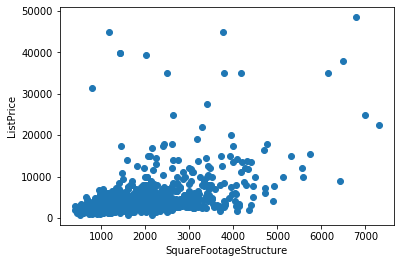

In [11]:
x = data_mod['SquareFootageStructure']
y = data_mod['ListPrice']



fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('SquareFootageStructure')
ax.set_ylabel('ListPrice')
#plt.ylim(0,150000)


plt.show()

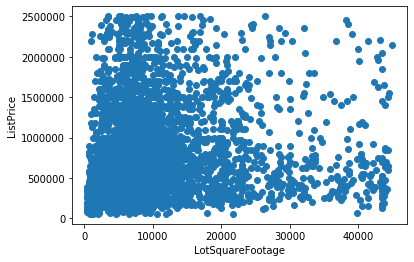

In [7]:
x = data_mod['LotSquareFootage']
y = data_mod['ListPrice']



fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('LotSquareFootage')
ax.set_ylabel('ListPrice')


plt.show()

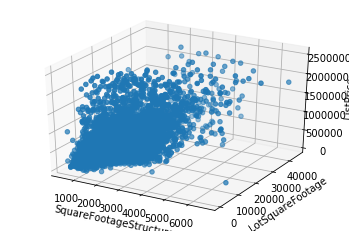

In [8]:
x = data_mod['SquareFootageStructure']
y = data_mod['LotSquareFootage']
z = data_mod['ListPrice']

ax = plt.figure().gca(projection='3d')
ax.scatter(x,y,z)
ax.set_xlabel('SquareFootageStructure')
ax.set_ylabel('LotSquareFootage')
ax.set_zlabel('ListPrice')


plt.show()